In [ ]:
#UMAP stuff only - cleaned up


In [2]:
%pip install numpy
%pip install pandas
%pip install seaborn
%pip install umap-learn
from IPython.display import clear_output

for i in range(10):
    clear_output(wait=True)
    print("Hello World!")

Hello World!


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from umap.umap_ import UMAP
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
#Reading the music data from CSV

df = pd.read_csv("data/dataset.csv")
print(len(df))
df = df.dropna()
print(len(df))
df.head()

16269
16268


,Unnamed: 0,id_x,track.artists,track.name,playlist_id,name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,track.popularity
0,0,6YIivt0G3ZUuNrM62jp9pL,AJR,Way Less Sad,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.695,0.541,2,-8.350,1,0.0460,0.00707,0.000000,0.1040,0.409,140.018,207600,4,63.0
1,4,4MTmAFWHpvB9kPMSRgLFRp,The Lumineers,WHERE WE ARE,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.573,0.507,11,-8.084,1,0.0342,0.75900,0.000001,0.3770,0.363,123.183,172800,4,64.0
2,8,6y6xhAgZjvxy5kR5rigpY3,"Alesso, Marshmello, James Bay",Chasing Stars (feat. James Bay),37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.594,0.640,10,-6.865,1,0.0330,0.01690,0.000000,0.1350,0.492,92.871,170457,4,72.0
3,12,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain't Worried,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,148486,4,96.0
4,18,3o9kpgkIcffx0iSwxhuNI2,Em Beihold,Numb Little Bug,37i9dQZF1DX3rxVfibe1L0,Mood Booster,0.742,0.527,8,-6.892,0,0.0769,0.32700,0.000000,0.2500,0.638,84.974,169238,4,79.0


In [6]:
#Feature Selection

columns_to_select = [
    # "id_x",             # Track id
    # "track.artists",
    # "track.name",
    # "playlist_id",
    # "name",             # Playlist name
    # "track.popularity"
    # "duration_ms",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "time_signature"
]

# Filter the playlists if needed and drop duplicates
# df_filtered = df[df['name'].isin(playlists_to_select)]
df_filtered = df.drop_duplicates(subset=['id_x'])

In [7]:
#Should we iuse any normalization, scaling?

#scaler = StandardScaler()
#X = scaler.fit_transform(df_filtered[columns_to_select])

#UMAP transformation
X = df_filtered[columns_to_select]
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
print(embedding.shape)

(14538, 2)


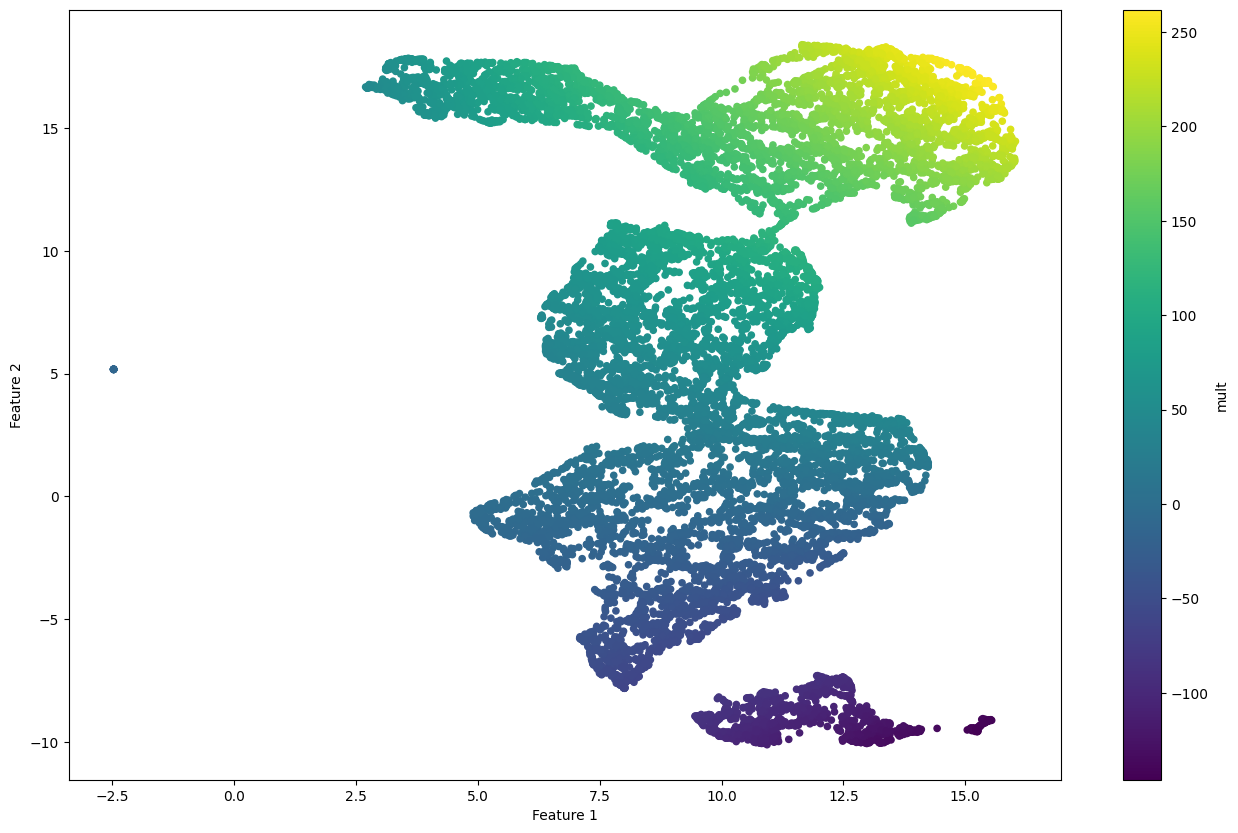

In [12]:
#Plotting
lower_dim = pd.DataFrame(embedding, columns=['Feature 1', 'Feature 2'])
#Create a column for visualisation purposes
lower_dim['mult'] = (lower_dim['Feature 1'])*(lower_dim['Feature 2'])
plot_umap = lower_dim.plot.scatter(x='Feature 1', y='Feature 2', c='mult', cmap='gist_rainbow', figsize=(16, 10))